<a href="https://colab.research.google.com/github/Chandana909/DAV/blob/main/DAV_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
""" Download the latest YouTube dataset from Kaggle and print its file path. """
import kagglehub
path = kagglehub.dataset_download("datasnaek/youtube-new")
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115


In [18]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Load the dataset (modify the file name if necessary)
df = pd.read_csv(f"{path}/USvideos.csv")  # Adjust based on your dataset

# Display column names
print(df.columns)
print(df.head())


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time

In [20]:
# Check for missing values
print(df.isnull().sum())
# Fill missing values with appropriate values or drop them
df.fillna({"likes": df["likes"].median(), "dislikes": df["dislikes"].median()}, inplace=True)
df.dropna(subset=["views", "title"], inplace=True)


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [21]:
""" Display column data types and convert 'views', 'likes', and 'dislikes' to integers. """
print(df.dtypes)
df["views"] = df["views"].astype(int)
df["likes"] = df["likes"].astype(int)
df["dislikes"] = df["dislikes"].astype(int)



video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [22]:
df.describe()


,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [23]:
# Find top 10 videos by views
top_videos = df.sort_values(by="views", ascending=False).head(10)
print(top_videos[["title", "views", "likes"]])


                                                   title      views    likes
38547  Childish Gambino - This Is America (Official V...  225211923  5023450
38345  Childish Gambino - This Is America (Official V...  220490543  4962403
38146  Childish Gambino - This Is America (Official V...  217750076  4934188
37935  Childish Gambino - This Is America (Official V...  210338856  4836448
37730  Childish Gambino - This Is America (Official V...  205643016  4776680
37531  Childish Gambino - This Is America (Official V...  200820941  4714942
37333  Childish Gambino - This Is America (Official V...  196222618  4656929
37123  Childish Gambino - This Is America (Official V...  190950401  4594931
36913  Childish Gambino - This Is America (Official V...  184446490  4512326
36710  Childish Gambino - This Is America (Official V...  179045286  4437175


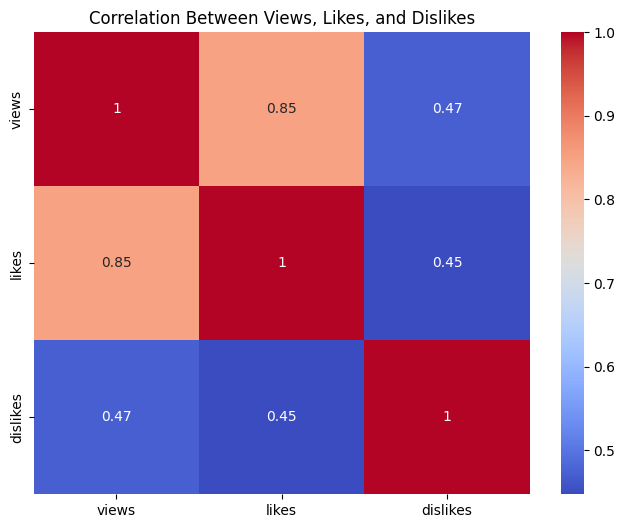

In [24]:
#heatmap to analyse the correlation between likes dislikes and views
plt.figure(figsize=(8,6))
sns.heatmap(df[["views", "likes", "dislikes"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Views, Likes, and Dislikes")
plt.show()


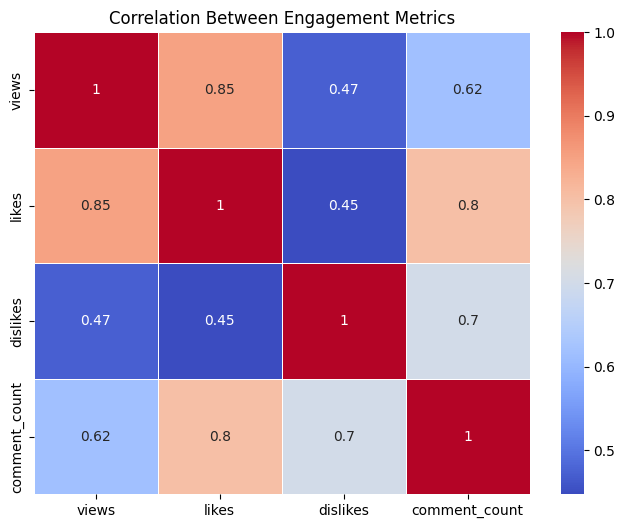

In [37]:
# correlation heatmap for video engagement
import seaborn as sns

# Select relevant numeric columns
corr_matrix = df[['views', 'likes', 'dislikes', 'comment_count']].corr()

# Generate heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Engagement Metrics")
plt.show()


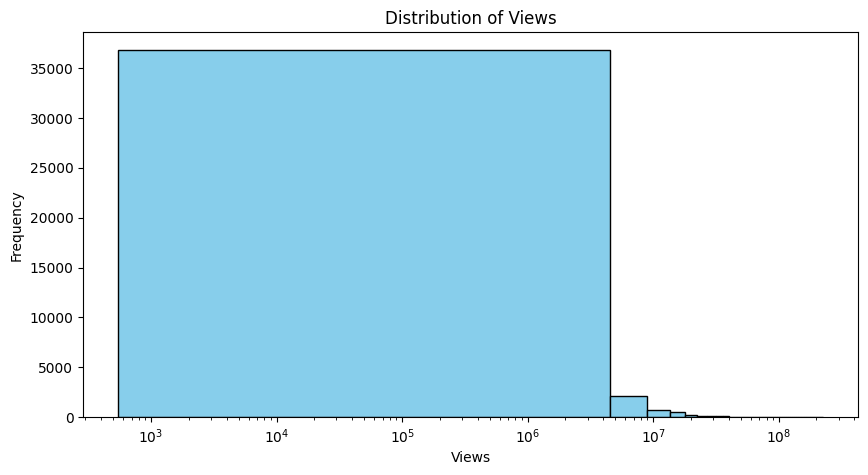

In [25]:
#distribution of views using a histogram on a logarithmic scale

plt.figure(figsize=(10,5))
plt.hist(df["views"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.title("Distribution of Views")
plt.xscale("log")  # Since views can vary greatly
plt.show()


<ipython-input-26-61cee14c2c07>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["upload_hour"], palette="viridis")


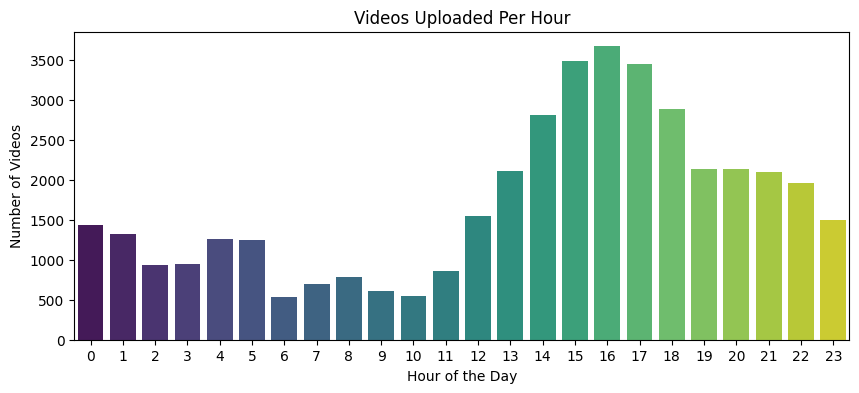

In [26]:
""" Analyze video upload patterns using time series by extracting and visualizing upload hours. """
df["upload_hour"] = pd.to_datetime(df["publish_time"]).dt.hour

plt.figure(figsize=(10,4))
sns.countplot(x=df["upload_hour"], palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Videos")
plt.title("Videos Uploaded Per Hour")
plt.show()



category_name
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: count, dtype: int64


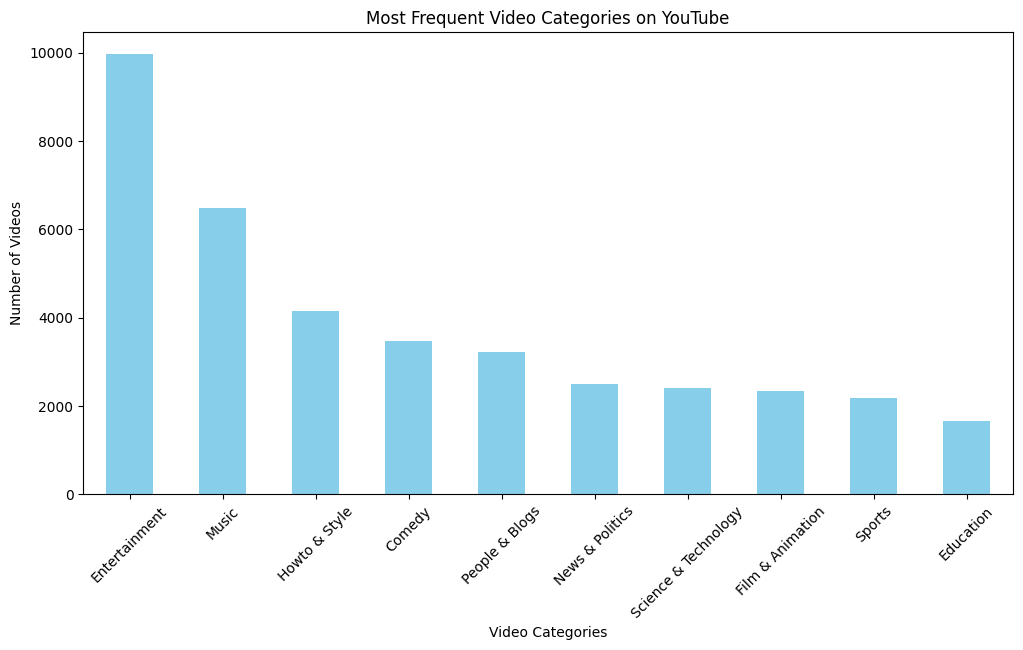

In [27]:
""" Map category IDs to names, count occurrences, and visualize the most frequent video categories. """
import json

with open(f"{path}/US_category_id.json", 'r') as f:
    categories = json.load(f)

# Create a mapping of category_id to category_name
category_mapping = {int(cat['id']): cat['snippet']['title'] for cat in categories['items']}

# Map the category_id to category names
df['category_name'] = df['category_id'].map(category_mapping)

# Count occurrences of each category
category_counts = df['category_name'].value_counts()

# Display the most frequent video categories
print(category_counts)

# Visualizing the top categories
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_counts.head(10).plot(kind='bar', color='skyblue')
plt.xlabel("Video Categories")
plt.ylabel("Number of Videos")
plt.title("Most Frequent Video Categories on YouTube")
plt.xticks(rotation=45)
plt.show()


                               likes      dislikes  comment_count
category                                                         
Nonprofits & Activism  259923.614035  58076.859649   84364.859649
Music                  218918.199011   7907.757726   19359.764524
Gaming                  84502.183599  11241.696450   18042.488372
Film & Animation        70787.836247   2590.681450    7627.744136
Comedy                  62582.223315   2091.521840    6521.718831
People & Blogs          58135.825234   3173.800935    7719.013084
Entertainment           53243.325070   4314.297772    7383.229426
Sports                  45363.942502   2361.339006    5148.185373
Howto & Style           39286.076942   1320.284370    5583.586589
Science & Technology    34374.276551   1894.378176    4993.721783
Education               29745.031401    816.408213    3286.378019
Pets & Animals          21055.110870    573.238043    2892.070652
Shows                   18993.666667    429.964912    1668.719298
Travel & E

<Figure size 1200x600 with 0 Axes>

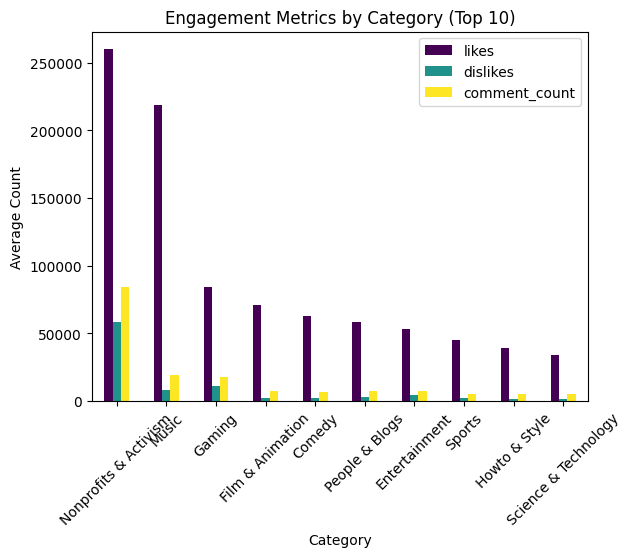

In [33]:
""" Compute and visualize average engagement metrics (likes, dislikes, comments) for each category. """
# Load category data and create category ID to name mapping
category_file = f"{path}/US_category_id.json"  # Adjust path if necessary
with open(category_file, "r") as f:
    category_data = json.load(f)

category_mapping = {int(item["id"]): item["snippet"]["title"] for item in category_data["items"]}

# Map category_id to category name
df["category"] = df["category_id"].map(category_mapping)

# Compute average engagement metrics per category
engagement_metrics = df.groupby("category").agg({
    "likes": "mean",
    "dislikes": "mean",
    "comment_count": "mean"
}).sort_values(by="likes", ascending=False)  # Sort by most liked categories

# Display engagement statistics
print(engagement_metrics)

# Visualize engagement metrics
plt.figure(figsize=(12, 6))
engagement_metrics[["likes", "dislikes", "comment_count"]].head(10).plot(kind="bar", colormap="viridis")
plt.xlabel("Category")
plt.ylabel("Average Count")
plt.title("Engagement Metrics by Category (Top 10)")
plt.xticks(rotation=45)
plt.show()


In [34]:
""" Perform sentiment analysis on video titles and categorize as Positive, Neutral, or Negative. """
from textblob import TextBlob

# Function to compute sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis to video titles
df['title_sentiment'] = df['title'].apply(get_sentiment)

# Categorize sentiment
df['title_sentiment_category'] = df['title_sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display sentiment distribution
print(df['title_sentiment_category'].value_counts())


title_sentiment_category
Neutral     23637
Positive    11492
Negative     5820
Name: count, dtype: int64


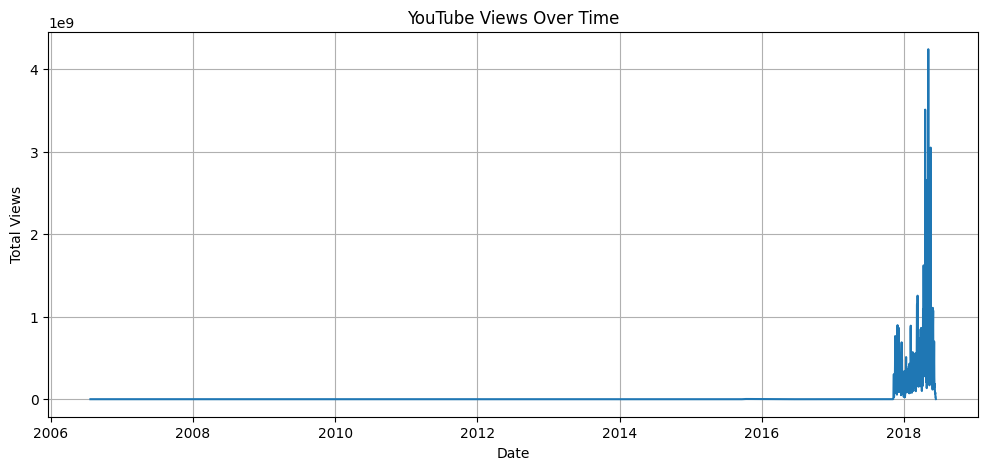

In [35]:
""" Analyze time-series trends of YouTube views based on video publish dates. """
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Extract date parts
df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour

# Aggregate views per day
daily_trend = df.groupby('publish_date')['views'].sum()

# Plot time-series trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
daily_trend.plot()
plt.title("YouTube Views Over Time")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.grid()
plt.show()


clickbait
False    2.368336e+06
True     1.386631e+06
Name: views, dtype: float64


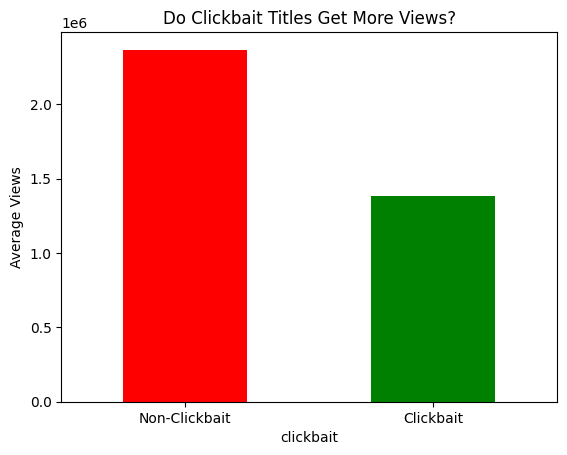

In [36]:
"""Analyzes whether clickbait words in video titles lead to higher average views."""

# Clickbait Analysis: Do Certain Words Attract More Views?
clickbait_words = ['shocking', 'amazing', 'must watch', 'unbelievable', 'you won’t believe', 'insane', 'epic']

# Count videos with clickbait words
df['clickbait'] = df['title'].apply(lambda x: any(word in x.lower() for word in clickbait_words))

# Compare average views for clickbait vs non-clickbait videos
clickbait_stats = df.groupby('clickbait')['views'].mean()

print(clickbait_stats)

# Plot comparison
clickbait_stats.plot(kind='bar', color=['red', 'green'])
plt.xticks([0,1], ['Non-Clickbait', 'Clickbait'], rotation=0)
plt.ylabel('Average Views')
plt.title('Do Clickbait Titles Get More Views?')
plt.show()
